In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Column used for calculating survival curve of selected genes
col_list = ["days_to_death", "log2_IL13RA1", "log2_IL13RA2", "log2_IL4R", "log2_SPHK1", "log2_CLCF1",
              "log2_SFN", "log2_FAS", "log2_MCAM", "log2_LMNA", "log2_SOD3", "log2_MYOF", "log2_RUNX1",
            "log2_TCF3", "log2_TDG", "log2_NES", "log2_AQR"]

In [6]:
# open csv that stores the log2 ratio data
gbm = pd.read_csv("/content/drive/MyDrive/bioinfo_project/log2_GBM_gene_expression.csv")
gbm.head(10)

,Unnamed: 0,file_name,case_id,sample_id,sample_type,age_at_index,days_to_birth,days_to_death,gender,sample_uuid,...,HK2,log2_HK2,TFEC,log2_TFEC,EVI2B,log2_EVI2B,MED20,log2_MED20,SAMSN1,log2_SAMSN1
0,0,54c6eff1-866a-4b26-9778-6b085fc25123.rna_seq.a...,TCGA-76-4927,TCGA-76-4927-01A,Primary Tumor,58,-21193,535,male,00426c02-8fec-4862-92e6-876a81533b9e,...,6.9890,-0.430356,0.8821,-0.360886,7.1753,-0.456227,8.7912,0.405065,5.9589,0.807150
1,1,41bdf255-88ed-4346-9033-7813b2c97d84.rna_seq.a...,TCGA-28-5215,TCGA-28-5215-01A,Primary Tumor,62,-22686,335,female,006aabaf-a659-436d-baed-f59795f934cf,...,11.6301,0.304267,0.8785,-0.366780,9.3680,-0.071572,8.2943,0.321135,4.9939,0.552318
2,2,511393a1-da49-4cf1-80d6-7f50a6c3043d.rna_seq.a...,TCGA-06-2559,TCGA-06-2559-01A,Primary Tumor,83,-30580,150,male,00cce172-4b2b-4cb5-b6dd-47c9627972af,...,22.7410,1.271638,1.0331,-0.133159,7.1344,-0.464473,7.9302,0.256380,2.6691,-0.351244
3,3,58d714ce-bdb7-4365-b3f9-a5464237b1d4.rna_seq.a...,TCGA-06-0644,TCGA-06-0644-01A,Primary Tumor,71,-26247,384,male,03fc636b-9e3d-42ea-88cf-8081539a9859,...,16.1181,0.775050,1.0820,-0.066502,8.8378,-0.155617,6.8855,0.052612,3.6900,0.115874
4,4,efbd20eb-2922-4904-8cf1-88d5bb09ab30.rna_seq.a...,TCGA-06-2567,TCGA-06-2567-01A,Primary Tumor,65,-23759,133,male,068454cb-7789-4814-80a0-1935c6a08798,...,19.4577,1.046694,1.3628,0.266097,8.1943,-0.264671,6.6862,0.010243,3.7612,0.143439
5,5,9e79eb6c-bdfa-4deb-b283-7c351dac4434.rna_seq.a...,TCGA-06-0158,TCGA-06-0158-01A,Primary Tumor,73,-26856,329,male,06e61218-fbda-4a4f-a9ec-16ccf5255ded,...,13.3255,0.500577,1.1385,0.006866,7.9765,-0.303531,7.0223,0.080990,3.0786,-0.145395
6,6,5763b7c5-89cb-49c4-87aa-bad01f28b541.rna_seq.a...,TCGA-06-5408,TCGA-06-5408-01A,Primary Tumor,54,-20063,357,female,09326c4e-9905-444f-aa11-f2944045e455,...,11.7815,0.322925,0.5123,-1.143661,4.5400,-1.116457,11.1578,0.748951,2.0011,-0.766624
7,7,5a2fb8ba-a509-4216-83b5-174c1ee94c17.rna_seq.a...,TCGA-12-5295,TCGA-12-5295-01A,Primary Tumor,60,-22161,454,female,0d880932-47ab-4b88-b00e-6921d2be5936,...,2.0405,-2.206019,1.3900,0.294587,25.2183,1.356989,11.4683,0.788546,6.9695,1.033124
8,8,23f3b0c8-dc66-445e-9d05-bd631e00f2ee.rna_seq.a...,TCGA-06-0238,TCGA-06-0238-01A,Primary Tumor,46,-17037,405,male,14aff5e3-5f0c-4e7c-abec-806009b5a39a,...,8.1247,-0.213157,1.8430,0.701304,16.6585,0.758806,11.3640,0.775366,7.5444,1.147460
9,9,aab4bee0-b7a4-4671-b7e3-e11f11abe0e7.rna_seq.a...,TCGA-26-5136,TCGA-26-5136-01B,Primary Tumor,78,-28496,577,female,1b8cc228-a020-4418-be03-ad409d781728,...,14.7634,0.648402,1.8607,0.715085,10.3193,0.067946,8.6628,0.383841,6.4652,0.924780


# 3 groups

separate data into 3 groups  
group 1: <-1  
group 2: -1 ~ 0  
group 3: > 1

In [7]:
# create subset of dataframe only containing days to death and IL13RA2
sub = gbm[['days_to_death', 'log2_IL13RA2']]
sub.head(10)

,days_to_death,log2_IL13RA2
0,535,-2.853658
1,335,1.393723
2,150,1.262403
3,384,1.590154
4,133,0.277215
5,329,-2.475440
6,357,1.268294
7,454,-0.052403
8,405,0.550444
9,577,2.106355


In [8]:
# get group 1 data
g1 = sub.loc[sub['log2_IL13RA2'] <= -1, :]
g1.head(10)

,days_to_death,log2_IL13RA2
0,535,-2.853658
5,329,-2.475440
17,1458,-4.126794
25,427,-2.848076
28,1537,-1.315338
40,460,-1.069893
41,360,-4.059719
42,119,-1.303649
43,454,-3.996800
44,224,-2.754104


In [9]:
g1.shape

(43, 2)

In [10]:
# get group 2
g2 = sub.loc[(sub['log2_IL13RA2'] <= 0) & (sub['log2_IL13RA2'] > -1), :]
g2.head(5)

,days_to_death,log2_IL13RA2
7,454,-0.052403
15,666,-0.808131
34,1448,-0.214393
47,68,-0.407368
48,442,-0.499841


In [11]:
g2.shape

(16, 2)

In [12]:
# get group 3
g3 = sub.loc[sub['log2_IL13RA2'] > 0, :]
g3.head(5)

,days_to_death,log2_IL13RA2
1,335,1.393723
2,150,1.262403
3,384,1.590154
4,133,0.277215
6,357,1.268294


In [13]:
g3.shape

(77, 2)

In [14]:
# get KM package
!pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=f09f5bdab392f975777dd361892d58db0edd98204fc3b882cafc64d88dcc32fa
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [15]:
# fitting KM of group 1
group1 = KaplanMeierFitter()
T = g1.days_to_death
C = [True for i in range(len(g1.days_to_death))]
group1.fit(T, C)
g1_ms = group1.median_survival_time_

In [16]:
# fitting KM of group 2
group2 = KaplanMeierFitter()
T = g2.days_to_death
C = [True for i in range(len(g2.days_to_death))]
group2.fit(T, C)
g2_ms = group2.median_survival_time_

In [17]:
# fitting KM of group 3
group3 = KaplanMeierFitter()
T = g3.days_to_death
C = [True for i in range(len(g3.days_to_death))]
group3.fit(T, C)
g3_ms = group3.median_survival_time_

In [18]:
# median survival day of each group
print(g1_ms)
print(g2_ms)
print(g3_ms)

394.0
406.0
343.0


(0.0, 2815.05)

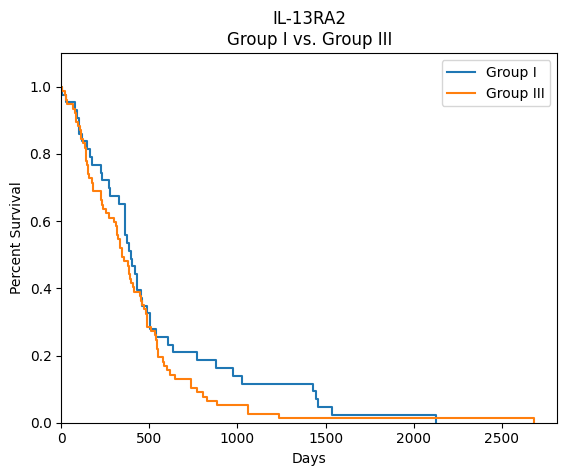

In [19]:
# group I vs group III survival curve
group1.plot(label = 'Group I', ci_show = False)
group3.plot(label = "Group III", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("IL-13RA2\nGroup I vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

(0.0, 2815.05)

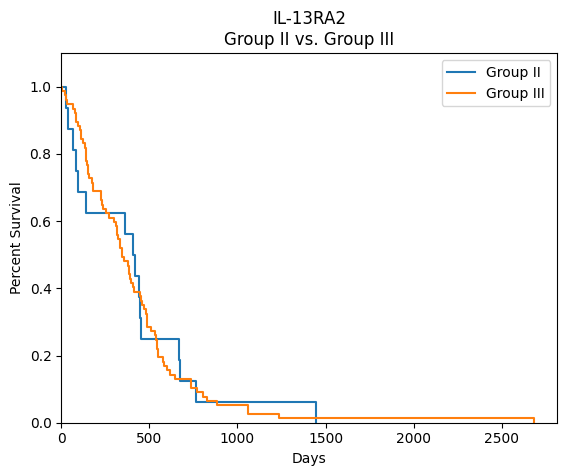

In [20]:
# group II vs group III survival curve
group2.plot(label = 'Group II', ci_show = False)
group3.plot(label = "Group III", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("IL-13RA2\nGroup II vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

In [21]:
# logrank test of group I vs group III
results = logrank_test(g1.days_to_death, g3.days_to_death)
print(results.p_value)

0.1942909615098351


In [22]:
# logrank test of group I vs group III
results = logrank_test(g2.days_to_death, g3.days_to_death)
print(results.p_value)

0.8991782380430464


In [23]:
# repeat for IL13RA1
ra1_sub = gbm[['days_to_death', 'log2_IL13RA1']]
ra1_sub.head(10)

,days_to_death,log2_IL13RA1
0,535,0.148507
1,335,0.303910
2,150,-0.394540
3,384,0.786425
4,133,-0.040723
5,329,0.369415
6,357,-0.223550
7,454,0.441131
8,405,-0.220640
9,577,-0.447339


In [24]:
# separate into 3 groups
ra1_g1 = ra1_sub.loc[ra1_sub['log2_IL13RA1'] <= -1, :]
ra1_g2 = ra1_sub.loc[(ra1_sub['log2_IL13RA1'] <= 0) & (ra1_sub['log2_IL13RA1'] > -1), :]
ra1_g3 = ra1_sub.loc[ra1_sub['log2_IL13RA1'] > 0, :]

In [25]:
print(ra1_g1.shape)
print(ra1_g2.shape)
print(ra1_g3.shape)

(21, 2)
(52, 2)
(63, 2)


In [26]:
# fitting
ra1_1 = KaplanMeierFitter()
T = ra1_g1.days_to_death
C = [True for i in range(len(ra1_g1.days_to_death))]
ra1_1.fit(T, C)
ra1_g1_ms = ra1_1.median_survival_time_

In [27]:
# fitting
ra1_2 = KaplanMeierFitter()
T = ra1_g2.days_to_death
C = [True for i in range(len(ra1_g2.days_to_death))]
ra1_2.fit(T, C)
ra1_g2_ms = ra1_2.median_survival_time_
ra1_3 = KaplanMeierFitter()
T = ra1_g3.days_to_death
C = [True for i in range(len(ra1_g3.days_to_death))]
ra1_3.fit(T, C)
ra1_g3_ms = ra1_3.median_survival_time_

In [28]:
# median survival day
print(ra1_g1_ms)
print(ra1_g2_ms)
print(ra1_g3_ms)

455.0
380.0
335.0


(0.0, 2815.05)

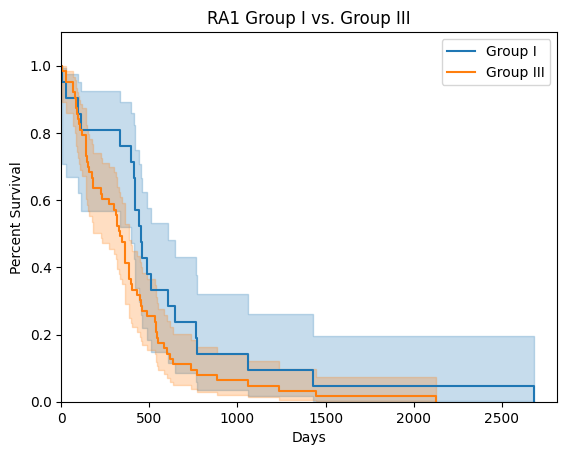

In [29]:
# group I vs group III survival curve
ra1_1.plot(label = 'Group I')
ra1_3.plot(label = "Group III")
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("RA1 Group I vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

(0.0, 2232.3)

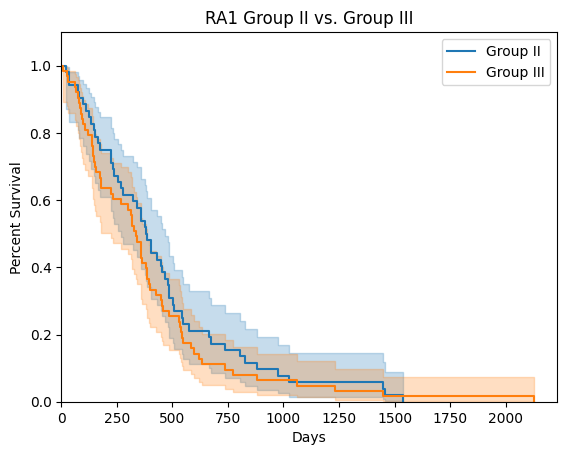

In [30]:
# group II vs group III survival curve
ra1_2.plot(label = 'Group II')
ra1_3.plot(label = "Group III")
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("RA1 Group II vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

In [31]:
# logrank test to get pval
ra1_g1g3 = logrank_test(ra1_g1.days_to_death, ra1_g3.days_to_death)
print(ra1_g1g3.p_value)
ra1_g2g3 = logrank_test(ra1_g2.days_to_death, ra1_g3.days_to_death)
print(ra1_g2g3.p_value)

0.05823179085324407
0.3257119346734241


In [32]:
# create a subset using the selected columns
filtered_df = gbm[col_list]
filtered_df.head(5)

,days_to_death,log2_IL13RA1,log2_IL13RA2,log2_IL4R,log2_SPHK1,log2_CLCF1,log2_SFN,log2_FAS,log2_MCAM,log2_LMNA,log2_SOD3,log2_MYOF,log2_RUNX1,log2_TCF3,log2_TDG,log2_NES,log2_AQR
0,535,0.148507,-2.853658,0.342853,1.482478,-0.381306,1.741417,0.173513,1.788122,0.548873,0.059052,0.653249,1.287618,0.392797,0.521387,0.695733,0.011886
1,335,0.303910,1.393723,0.283165,1.617391,0.346188,-0.862595,-1.597563,1.209808,-0.273874,-0.824495,0.966648,1.044806,-0.397495,0.836742,0.519493,-0.148727
2,150,-0.394540,1.262403,-0.293478,0.440731,0.499067,0.771094,0.594414,1.229834,-0.018138,0.477284,0.088291,0.214540,0.216198,1.462582,0.231658,0.194491
3,384,0.786425,1.590154,1.077942,2.447930,2.271177,0.218922,1.045404,1.131514,2.262503,1.877843,1.762842,2.412724,-0.280388,0.907493,0.865559,-0.325266
4,133,-0.040723,0.277215,0.570595,0.039368,2.088201,0.713374,1.545207,0.222284,-0.011170,-1.226295,0.014678,-0.100531,-0.527590,0.249495,-0.514409,0.290218


In [33]:
# obtain groups based on IL13RA1 and Il13RA2 log2 ratio
g1 = filtered_df.loc[(filtered_df['log2_IL13RA2'] <= -1) & (filtered_df['log2_IL13RA1'] <= -1)]
g2 = filtered_df.loc[(filtered_df['log2_IL13RA2'] <= 0) & (filtered_df['log2_IL13RA2'] > -1) & (filtered_df['log2_IL13RA1'] <= 0) & (filtered_df['log2_IL13RA1'] > -1)]
g3 = filtered_df.loc[(filtered_df['log2_IL13RA2'] > 0) & (filtered_df['log2_IL13RA1'] > 0)]
print(g1.shape)
print(g2.shape)
print(g3.shape)

(7, 17)
(4, 17)
(38, 17)


In [34]:
# fitting KM for multigeneic group of RA1 and RA2
ra12_1 = KaplanMeierFitter()
T = g1.days_to_death
C = [True for i in range(len(g1.days_to_death))]
ra12_1.fit(T, C)
ra12_g1_ms = ra12_1.median_survival_time_

ra12_2 = KaplanMeierFitter()
T = g2.days_to_death
C = [True for i in range(len(g2.days_to_death))]
ra12_2.fit(T, C)
ra12_g2_ms = ra12_2.median_survival_time_

ra12_3 = KaplanMeierFitter()
T = g3.days_to_death
C = [True for i in range(len(g3.days_to_death))]
ra12_3.fit(T, C)
ra12_g3_ms = ra12_3.median_survival_time_

In [35]:
print(ra12_g1_ms)
print(ra12_g2_ms)
print(ra12_g3_ms)

489.0
406.0
317.0


(0.0, 1497.3)

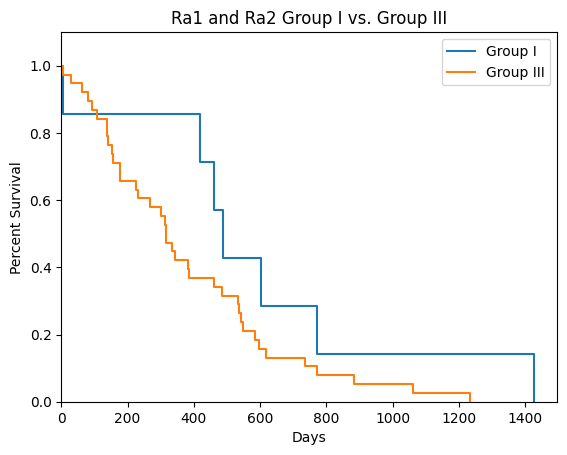

In [36]:
# survival curve of group I and group III
ra12_1.plot(label = 'Group I', ci_show = False)
ra12_3.plot(label = "Group III", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("Ra1 and Ra2 Group I vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

(0.0, 1294.65)

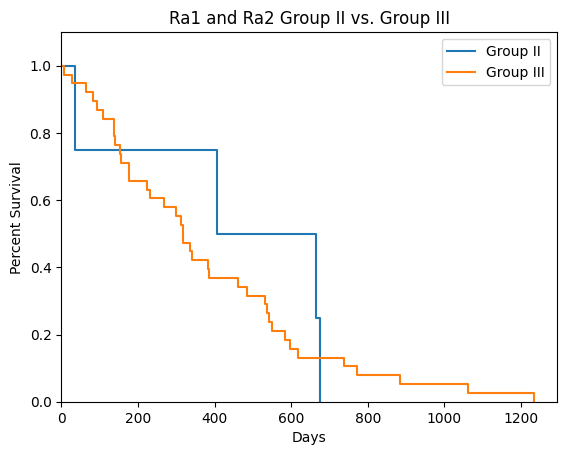

In [37]:
#survival curve of group II and group III
ra12_2.plot(label = 'Group II', ci_show = False)
ra12_3.plot(label = "Group III", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("Ra1 and Ra2 Group II vs. Group III")
plt.ylim(0,1.1)
plt.xlim(0, None)

In [38]:
# p val of group I vs group III and group II vs group III
ra12_g1g3 = logrank_test(g1.days_to_death, g3.days_to_death)
print(ra12_g1g3.p_value)
ra12_g2g3 = logrank_test(g2.days_to_death, g3.days_to_death)
print(ra12_g2g3.p_value)

0.12238734684233525
0.6494387461439552


In [39]:
# function for create groups and perform KM survival analysis
# input: dataframe, targeted gene
# output: survival curve of each group, median survival day of each group and p val for group I vs group III and group II vs group III
def km_survival_curve(df, gene):
  g1 = df.loc[df[gene] <= -1]
  g2 = df.loc[(df[gene] <= 0) & (df[gene] > -1)]
  g3 = df.loc[df[gene] > 0]
  print(g1.shape)
  print(g2.shape)
  print(g3.shape)
  if g1.shape[0] == 0 or g2.shape[0] == 0 or g3.shape[0] == 0:
    return []
  s1 = KaplanMeierFitter()
  T = g1.days_to_death
  C = [True for i in range(len(g1.days_to_death))]
  s1.fit(T, C)
  g1_ms = s1.median_survival_time_

  s2 = KaplanMeierFitter()
  T = g2.days_to_death
  C = [True for i in range(len(g2.days_to_death))]
  s2.fit(T, C)
  g2_ms = s2.median_survival_time_

  s3 = KaplanMeierFitter()
  T = g3.days_to_death
  C = [True for i in range(len(g3.days_to_death))]
  s3.fit(T, C)
  g3_ms = s3.median_survival_time_
  print(g1_ms)
  print(g2_ms)
  print(g3_ms)
  r1 = logrank_test(g1.days_to_death, g3.days_to_death)
  r2 = logrank_test(g2.days_to_death, g3.days_to_death)
  print(r1.p_value)
  print(r2.p_value)
  sc = [s1, s2, s3]
  ms = [g1_ms, g2_ms, g3_ms]
  pval = [r1.p_value, r2.p_value]
  return sc, ms, pval

In [40]:
# create a dict to store info
gene_sc = {g:[] for g in col_list[1:]}

In [41]:
# perform KM analysis on all the selected genes
for g in col_list[1:]:
  print(g)
  gene_sc[g].append(km_survival_curve(filtered_df, g))

log2_IL13RA1
(21, 17)
(52, 17)
(63, 17)
455.0
380.0
335.0
0.05823179085324407
0.3257119346734241
log2_IL13RA2
(43, 17)
(16, 17)
(77, 17)
394.0
406.0
343.0
0.1942909615098351
0.8991782380430464
log2_IL4R
(16, 17)
(60, 17)
(60, 17)
419.0
442.0
317.0
0.22172118167679494
0.032554599797958626
log2_SPHK1
(14, 17)
(41, 17)
(81, 17)
442.0
480.0
313.0
0.2602522096732284
0.014148185570562877
log2_CLCF1
(19, 17)
(23, 17)
(94, 17)
454.0
448.0
329.0
0.1532159338000012
0.20090897402515984
log2_SFN
(45, 17)
(29, 17)
(62, 17)
442.0
357.0
317.0
0.05286414332363341
0.42145270819307346
log2_FAS
(14, 17)
(21, 17)
(101, 17)
548.0
427.0
360.0
0.07443600745751544
0.6449943958253364
log2_MCAM
(1, 17)
(27, 17)
(108, 17)
485.0
442.0
360.0
0.8269980968091681
0.1350190302766735
log2_LMNA
(9, 17)
(54, 17)
(73, 17)
603.0
360.0
360.0
0.017823571200230842
0.614417026103219
log2_SOD3
(26, 17)
(45, 17)
(65, 17)
427.0
405.0
342.0
0.08176646174211018
0.10248880124005771
log2_MYOF
(26, 17)
(50, 17)
(60, 17)
419.0
414.0
31

In [42]:
# multigeneic KM analysis
# input: dataframe and 2 selected genes
# output: survival curve of each group, median survival day of each group and p val for group I vs group III and group II vs group III
def two_gene_km(df, gene1, gene2):
  g1 = df.loc[(df[gene1] <= -1) & (df[gene2] <= -1)]
  g2 = df.loc[(df[gene1] <= 0) & (df[gene1] > -1) & (df[gene2] <= 0) & (df[gene2] > -1)]
  g3 = df.loc[(df[gene1] > 0) & (df[gene2] > 0)]

  print(g1.shape)
  print(g2.shape)
  print(g3.shape)

  if g1.shape[0] == 0 or g2.shape[0] == 0 or g3.shape[1] == 0:
    return []

  s1 = KaplanMeierFitter()
  T = g1.days_to_death
  C = [True for i in range(len(g1.days_to_death))]
  s1.fit(T, C)
  g1_ms = s1.median_survival_time_

  s2 = KaplanMeierFitter()
  T = g2.days_to_death
  C = [True for i in range(len(g2.days_to_death))]
  s2.fit(T, C)
  g2_ms = s2.median_survival_time_

  s3 = KaplanMeierFitter()
  T = g3.days_to_death
  C = [True for i in range(len(g3.days_to_death))]
  s3.fit(T, C)
  g3_ms = s3.median_survival_time_

  print(g1_ms)
  print(g2_ms)
  print(g3_ms)

  r1 = logrank_test(g1.days_to_death, g3.days_to_death)
  r2 = logrank_test(g2.days_to_death, g3.days_to_death)
  print(r1.p_value)
  print(r2.p_value)
  sc = [s1, s2, s3]
  ms = [g1_ms, g2_ms, g3_ms]
  pval = [r1.p_value, r2.p_value]
  return sc, ms, pval

In [43]:
# dict to store info
two_gene = {g:[] for g in col_list[1:]}

In [44]:
# perform KM analysis of selected genes with RA2
for g in col_list[1:]:
  if g != "log2_IL13RA2":
    print(g)
    two_gene[g].append(two_gene_km(filtered_df, "log2_IL13RA2", g))

log2_IL13RA1
(7, 17)
(4, 17)
(38, 17)
489.0
406.0
317.0
0.12238734684233525
0.6494387461439552
log2_IL4R
(5, 17)
(10, 17)
(39, 17)
603.0
406.0
269.0
0.13198205868144913
0.4115382413450215
log2_SPHK1
(4, 17)
(5, 17)
(51, 17)
772.0
666.0
300.0
0.055970796875142954
0.15391917847616415
log2_CLCF1
(9, 17)
(3, 17)
(54, 17)
460.0
419.0
313.0
0.04660062590805464
0.5966475070451286
log2_SFN
(18, 17)
(4, 17)
(36, 17)
505.0
406.0
317.0
0.017298318720885806
0.8003314860596125
log2_FAS
(7, 17)
(1, 17)
(61, 17)
772.0
675.0
317.0
0.03020536194849695
0.4700942158916599
log2_MCAM
(0, 17)
(2, 17)
(57, 17)
log2_LMNA
(4, 17)
(8, 17)
(34, 17)
603.0
419.0
317.0
0.04404303138204849
0.6031797270524415
log2_SOD3
(13, 17)
(4, 17)
(41, 17)
489.0
454.0
317.0
0.03800381268407469
0.43985568898754557
log2_MYOF
(10, 17)
(7, 17)
(40, 17)
419.0
142.0
300.0
0.5486877025156649
0.49604528815252047
log2_RUNX1
(2, 17)
(2, 17)
(54, 17)
460.0
26.0
317.0
0.5859825369981501
0.3083162818956183
log2_TCF3
(3, 17)
(6, 17)
(30, 17)


# 2 groups

separate data into 2 groups based on log2 ratio  
Group 1: <= 0  
Group 2: > 0

In [45]:
# function to perform KM analysis of data
# separate data into 2 groups
# input dataframe, gene
# output: survival curve of each group, median survival day of each group and p val for group I vs group II
def twogroup_km_survival_curve(df, gene):
  g1 = df.loc[df[gene] <= 0]
  g2 = df.loc[df[gene] > 0]
  print(g1.shape)
  print(g2.shape)

  if g1.shape[0] == 0 or g2.shape[0] == 0:
    return []

  s1 = KaplanMeierFitter()
  T = g1.days_to_death
  C = [True for i in range(len(g1.days_to_death))]
  s1.fit(T, C)
  g1_ms = s1.median_survival_time_

  s2 = KaplanMeierFitter()
  T = g2.days_to_death
  C = [True for i in range(len(g2.days_to_death))]
  s2.fit(T, C)
  g2_ms = s2.median_survival_time_

  print(g1_ms)
  print(g2_ms)

  r1 = logrank_test(g1.days_to_death, g2.days_to_death)

  print(r1.p_value)

  sc = [s1, s2]
  ms = [g1_ms, g2_ms]
  pval = r1.p_value

  return [sc, ms, pval]

In [46]:
# function to perform multigenic KM analysis of data
# separate data into 2 groups
# input dataframe, gene 1 and gene 2
# output: survival curve of each group, median survival day of each group and p val for group I vs group II
def twogroup_two_gene_km(df, gene1, gene2):
  g1 = df.loc[(df[gene1] <= 0) & (df[gene2] <= 0)]
  g2 = df.loc[(df[gene1] > 0) & (df[gene2] > 0)]

  print(g1.shape)
  print(g2.shape)

  if g1.shape[0] == 0 or g2.shape[0] == 0:
    return []

  s1 = KaplanMeierFitter()
  T = g1.days_to_death
  C = [True for i in range(len(g1.days_to_death))]
  s1.fit(T, C)
  g1_ms = s1.median_survival_time_

  s2 = KaplanMeierFitter()
  T = g2.days_to_death
  C = [True for i in range(len(g2.days_to_death))]
  s2.fit(T, C)
  g2_ms = s2.median_survival_time_

  print(g1_ms)
  print(g2_ms)

  r1 = logrank_test(g1.days_to_death, g2.days_to_death)

  print(r1.p_value)

  sc = [s1, s2]
  ms = [g1_ms, g2_ms]
  pval = r1.p_value

  return [sc, ms, pval]

In [47]:
# dict to store one gene KM
twogroup = {g:[] for g in col_list[1:]}

In [48]:
# perform one gene KM on selected genes
for g in col_list[1:]:
  print(g)
  twogroup[g].append(twogroup_km_survival_curve(filtered_df, g))

log2_IL13RA1
(73, 17)
(63, 17)
419.0
335.0
0.09698734366611884
log2_IL13RA2
(59, 17)
(77, 17)
399.0
343.0
0.2689265165296095
log2_IL4R
(76, 17)
(60, 17)
432.0
317.0
0.026680812486557227
log2_SPHK1
(55, 17)
(81, 17)
455.0
313.0
0.01160121626617912
log2_CLCF1
(42, 17)
(94, 17)
448.0
329.0
0.07100915507952228
log2_SFN
(74, 17)
(62, 17)
414.0
317.0
0.07307170643760502
log2_FAS
(35, 17)
(101, 17)
460.0
360.0
0.14292883175824947
log2_MCAM
(28, 17)
(108, 17)
442.0
360.0
0.13149797012742412
log2_LMNA
(63, 17)
(73, 17)
395.0
360.0
0.5218587237319312
log2_SOD3
(71, 17)
(65, 17)
419.0
342.0
0.03641660360420672
log2_MYOF
(76, 17)
(60, 17)
419.0
317.0
0.06442666842888342
log2_RUNX1
(37, 17)
(99, 17)
406.0
360.0
0.2853409135733165
log2_TCF3
(70, 17)
(66, 17)
362.0
419.0
0.48631885574667744
log2_TDG
(5, 17)
(131, 17)
485.0
380.0
0.32574080077692047
log2_NES
(63, 17)
(73, 17)
388.0
360.0
0.6373085595159277
log2_AQR
(89, 17)
(47, 17)
343.0
414.0
0.6367227913357327


In [49]:
# get data of IL13RA2
ra2 = twogroup['log2_IL13RA2']
ra2

[[[<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 59 total observations, 0 right-censored observations>,
   <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 77 total observations, 0 right-censored observations>],
  [399.0, 343.0],
  0.2689265165296095]]

In [50]:
# get survival curve of RA2 group I and group II, their median survival day, and p val
ra2_1 = ra2[0][0][0]
ra2_2 = ra2[0][0][1]
ra2_1ms = ra2[0][1][0]
ra2_2ms = ra2[0][1][1]
ra2_p = ra2[0][2]

In [51]:
print(ra2_1ms)
print(ra2_2ms)
print(ra2_p)

399.0
343.0
0.2689265165296095


(0.0, 2815.05)

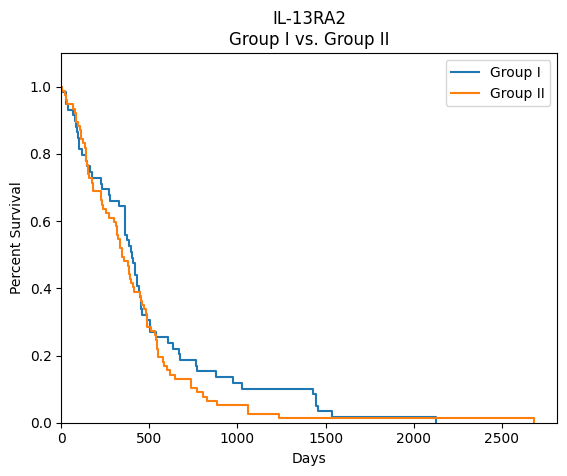

In [52]:
# survival curve of group I vs group II
ra2_1.plot(label = 'Group I', ci_show = False)
ra2_2.plot(label = 'Group II', ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("IL-13RA2\nGroup I vs. Group II")
plt.ylim(0,1.1)
plt.xlim(0, None)

In [53]:
# dict to store multigenic KM analysis
twogroup_2gene = {p: [] for p in col_list[1:]}

In [54]:
# perform multigenic KM analysis with SOD3
for g in col_list[1:]:
  if g != "log2_SOD3":
    print('SOD3 + ' + g)
    twogroup_2gene[g].append(twogroup_two_gene_km(filtered_df, "log2_SOD3", g))

SOD3 + log2_IL13RA1
(48, 17)
(40, 17)
419.0
317.0
0.02338118697738261
SOD3 + log2_IL13RA2
(35, 17)
(41, 17)
454.0
317.0
0.01922345144881036
SOD3 + log2_IL4R
(52, 17)
(41, 17)
442.0
317.0
0.00947071245441131
SOD3 + log2_SPHK1
(42, 17)
(52, 17)
460.0
317.0
0.005364312926512873
SOD3 + log2_CLCF1
(29, 17)
(52, 17)
442.0
300.0
0.018061378605946355
SOD3 + log2_SFN
(53, 17)
(44, 17)
427.0
317.0
0.02655784115478045
SOD3 + log2_FAS
(26, 17)
(56, 17)
432.0
313.0
0.049562048653223556
SOD3 + log2_MCAM
(19, 17)
(56, 17)
485.0
360.0
0.014556327307980064
SOD3 + log2_LMNA
(39, 17)
(41, 17)
414.0
360.0
0.08535940161282292
SOD3 + log2_MYOF
(53, 17)
(42, 17)
432.0
313.0
0.015049666353088983
SOD3 + log2_RUNX1
(26, 17)
(54, 17)
414.0
342.0
0.05965847612828313
SOD3 + log2_TCF3
(33, 17)
(28, 17)
395.0
360.0
0.3564107990528662
SOD3 + log2_TDG
(2, 17)
(62, 17)
119.0
317.0
0.8571253806268863
SOD3 + log2_NES
(28, 17)
(30, 17)
432.0
317.0
0.042422637542961286
SOD3 + log2_AQR
(45, 17)
(21, 17)
405.0
394.0
0.338831

In [55]:
# get all genes
col_name = [i for i in list(gbm.columns)[7:] if 'log2_' in i or 'days_to_death' == i]
col_name

['days_to_death',
 'log2_IL13RA1',
 'log2_IL13RA2',
 'log2_IL4',
 'log2_IL4R',
 'log2_NOTCH1',
 'log2_TOP2A',
 'log2_CD44',
 'log2_PTPRC',
 'log2_CDK4',
 'log2_HNRNPU',
 'log2_PDGFRA',
 'log2_CLCF1',
 'log2_CCR1',
 'log2_TGFBR2',
 'log2_MYC',
 'log2_TCF3',
 'log2_CENPA',
 'log2_SMC4',
 'log2_CDC20',
 'log2_CDC6',
 'log2_SSRP1',
 'log2_CHEK2',
 'log2_SPHK1',
 'log2_PTBP1',
 'log2_SMC3',
 'log2_DKC1',
 'log2_POLR2D',
 'log2_NIFK',
 'log2_PMAIP1',
 'log2_MECOM',
 'log2_RBBP4',
 'log2_SYNCRIP',
 'log2_YBX1',
 'log2_DDB2',
 'log2_TDG',
 'log2_WRAP53',
 'log2_ELAVL1',
 'log2_UBE2I',
 'log2_SFN',
 'log2_IKZF1',
 'log2_ZEB2',
 'log2_FAS',
 'log2_NT5E',
 'log2_IKBKB',
 'log2_HLA-C',
 'log2_VAV2',
 'log2_RFT1',
 'log2_SOD3',
 'log2_RUNX1',
 'log2_MCAM',
 'log2_NES',
 'log2_FKBP5',
 'log2_IDH1',
 'log2_LMNA',
 'log2_ETV1',
 'log2_FUS',
 'log2_CHD1',
 'log2_SCRIB',
 'log2_TLN1',
 'log2_FLNC',
 'log2_GART',
 'log2_NRXN1',
 'log2_GAD2',
 'log2_KCNC1',
 'log2_CACNA1D',
 'log2_SCN8A',
 'log2_ATP2B2',


In [56]:
# dict to store info
all_gene = {g:[] for g in col_name[1:]}

In [57]:
# perform two group KM analysis on all genes
for g in col_name[1:]:
  print(g)
  all_gene[g] += twogroup_km_survival_curve(gbm, g)

log2_IL13RA1
(73, 218)
(63, 218)
419.0
335.0
0.09698734366611884
log2_IL13RA2
(59, 218)
(77, 218)
399.0
343.0
0.2689265165296095
log2_IL4
(51, 218)
(85, 218)
380.0
384.0
0.9411181522055958
log2_IL4R
(76, 218)
(60, 218)
432.0
317.0
0.026680812486557227
log2_NOTCH1
(110, 218)
(26, 218)
362.0
395.0
0.6939030170092219
log2_TOP2A
(44, 218)
(92, 218)
342.0
388.0
0.4918044863022537
log2_CD44
(48, 218)
(88, 218)
419.0
342.0
0.32751010561458027
log2_PTPRC
(79, 218)
(57, 218)
414.0
360.0
0.43243325767356755
log2_CDK4
(58, 218)
(78, 218)
375.0
384.0
0.8284478725189192
log2_HNRNPU
(97, 218)
(39, 218)
360.0
455.0
0.250704059872516
log2_PDGFRA
(114, 218)
(22, 218)
394.0
270.0
0.4236912417005081
log2_CLCF1
(42, 218)
(94, 218)
448.0
329.0
0.07100915507952228
log2_CCR1
(39, 218)
(97, 218)
448.0
360.0
0.2676326130666133
log2_TGFBR2
(89, 218)
(47, 218)
414.0
343.0
0.9314984087329401
log2_MYC
(48, 218)
(88, 218)
419.0
360.0
0.9232407113622292
log2_TCF3
(70, 218)
(66, 218)
362.0
419.0
0.48631885574667744
l

In [58]:
 # get the ones with pval < 0.05 (significant difference between group I and group II)
 for g in col_name[1:]:
    #print(all_gene[g])
    #break
    if all_gene[g][2] < 0.05:
      print(g)
      print(all_gene[g][2])

log2_IL4R
0.026680812486557227
log2_SPHK1
0.01160121626617912
log2_PMAIP1
0.019617488907502974
log2_RBBP4
0.029569219941796752
log2_SOD3
0.03641660360420672


In [88]:
# dict to store multigenic two group KM analysis
all_gene_twogene = {g:[] for g in col_name[1:]}

In [89]:
# perforem multigenic two group KM on all genes with SOD3
for g in col_name[1:]:
  if g != "log2_SOD3":
    print("SOD3 + " + g)
    all_gene_twogene[g] += twogroup_two_gene_km(gbm, "log2_SOD3", g)

SOD3 + log2_IL13RA1
(48, 218)
(40, 218)
419.0
317.0
0.02338118697738261
SOD3 + log2_IL13RA2
(35, 218)
(41, 218)
454.0
317.0
0.01922345144881036
SOD3 + log2_IL4
(26, 218)
(40, 218)
414.0
360.0
0.10459446399447933
SOD3 + log2_IL4R
(52, 218)
(41, 218)
442.0
317.0
0.00947071245441131
SOD3 + log2_NOTCH1
(50, 218)
(5, 218)
432.0
375.0
0.30218603968318253
SOD3 + log2_TOP2A
(15, 218)
(36, 218)
414.0
360.0
0.15971380005142893
SOD3 + log2_CD44
(35, 218)
(52, 218)
419.0
317.0
0.038923773085256304
SOD3 + log2_PTPRC
(49, 218)
(35, 218)
427.0
342.0
0.03945996416611846
SOD3 + log2_CDK4
(25, 218)
(32, 218)
427.0
360.0
0.03545473760347866
SOD3 + log2_HNRNPU
(44, 218)
(12, 218)
405.0
419.0
0.6124001024041663
SOD3 + log2_PDGFRA
(54, 218)
(5, 218)
442.0
360.0
0.21231794075676036
SOD3 + log2_CLCF1
(29, 218)
(52, 218)
442.0
300.0
0.018061378605946355
SOD3 + log2_CCR1
(26, 218)
(52, 218)
419.0
313.0
0.056901647674610985
SOD3 + log2_TGFBR2
(57, 218)
(33, 218)
419.0
317.0
0.15672331357765126
SOD3 + log2_MYC
(2

In [90]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    #print(all_gene_twogene[g])
    #break
    if len(all_gene_twogene[g]) > 0:
      if all_gene_twogene[g][2] < 0.05:
        print(g)
        print(all_gene_twogene[g][2])

log2_IL13RA1
0.02338118697738261
log2_IL13RA2
0.01922345144881036
log2_IL4R
0.00947071245441131
log2_CD44
0.038923773085256304
log2_PTPRC
0.03945996416611846
log2_CDK4
0.03545473760347866
log2_CLCF1
0.018061378605946355
log2_CENPA
0.02789436634356231
log2_CDC20
0.031052480251091138
log2_CDC6
0.026160497653190867
log2_SSRP1
0.04974879943537458
log2_SPHK1
0.005364312926512873
log2_PTBP1
0.007205155037389328
log2_PMAIP1
0.00014458961068049842
log2_UBE2I
0.04266475738974599
log2_SFN
0.02655784115478045
log2_ZEB2
0.044463639323683045
log2_FAS
0.049562048653223556
log2_IKBKB
0.04922233124696861
log2_MCAM
0.014556327307980064
log2_NES
0.042422637542961286
log2_TLN1
0.03913237142288021
log2_CALM3
0.013350468505217103
log2_GABRA5
0.045216143239844055
log2_HAVCR2
0.033601677596433406
log2_MYOF
0.015049666353088983
log2_SSBP1
0.03771913082396543
log2_TTC25
0.024692568020870546
log2_CLN3
0.03945544640282127
log2_SPARC
0.005707004067333424
log2_PDPN
0.01352361278622112
log2_HK2
0.02914135797744845


In [91]:
# SOD3 data from two group KM
sod = all_gene['log2_SOD3']
sod

[[<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 71 total observations, 0 right-censored observations>,
  <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 65 total observations, 0 right-censored observations>],
 [419.0, 342.0],
 0.03641660360420672]

In [92]:
sod_g1 = sod[0][0]
sod_g2 = sod[0][1]
sod_g1_ms = sod[1][0]
sod_g2_ms = sod[1][1]
sod_pval = sod[2]

In [93]:
print(sod_g1_ms)
print(sod_g2_ms)

419.0
342.0


0.03641660360420672


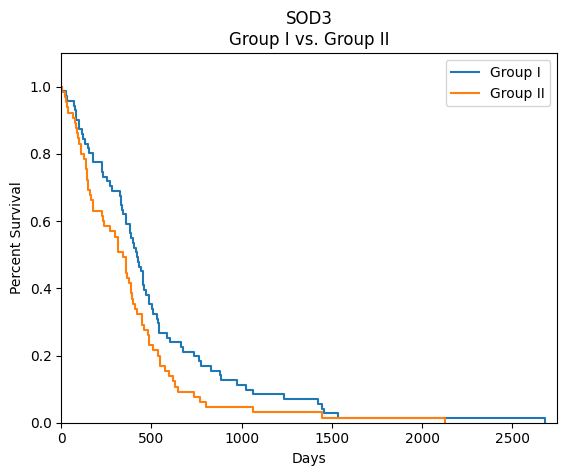

In [94]:
sod_g1.plot(label = 'Group I', ci_show = False)
sod_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("SOD3\nGroup I vs. Group II")
plt.ylim(0,1.1)
plt.xlim(0, 2750)
print(sod_pval)

In [95]:
# RA1, RA2, 4R multigenic KM with SOD3
ra1 = all_gene_twogene['log2_IL13RA1']
ra2 = all_gene_twogene['log2_IL13RA2']
il4r = all_gene_twogene['log2_IL4R']

In [96]:
ra1_g1 = ra1[0][0]
ra1_g2 = ra1[0][1]
ra1_g1_ms = ra1[1][0]
ra1_g2_ms = ra1[1][1]
ra1_pval = ra1[2]

ra2_g1 = ra2[0][0]
ra2_g2 = ra2[0][1]
ra2_g1_ms = ra2[1][0]
ra2_g2_ms = ra2[1][1]
ra2_pval = ra2[2]

il4r_g1 = il4r[0][0]
il4r_g2 = il4r[0][1]
il4r_g1_ms = il4r[1][0]
il4r_g2_ms = il4r[1][1]
il4r_pval = il4r[2]

In [97]:
print(ra1_g1_ms, ra1_g2_ms)
print(ra2_g1_ms, ra2_g2_ms)
print(il4r_g1_ms, il4r_g2_ms)

419.0 317.0
454.0 317.0
442.0 317.0


p_val: 0.023381


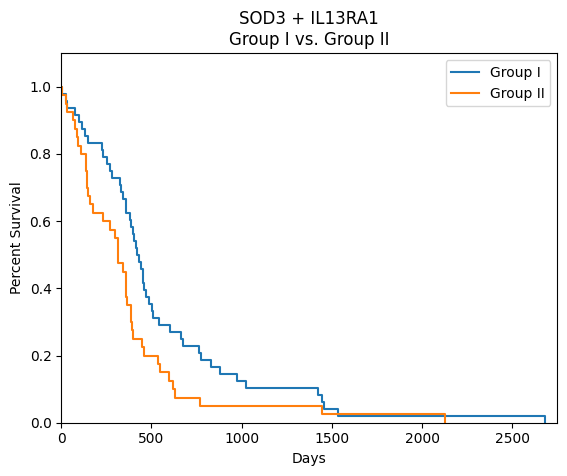

In [98]:
ra1_g1.plot(label = 'Group I', ci_show = False)
ra1_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("SOD3 + IL13RA1\nGroup I vs. Group II")
plt.ylim(0,1.1)
plt.xlim(0, 2750)
print('p_val: ' + str(round(ra1_pval, 6)))

p_val: 0.019223


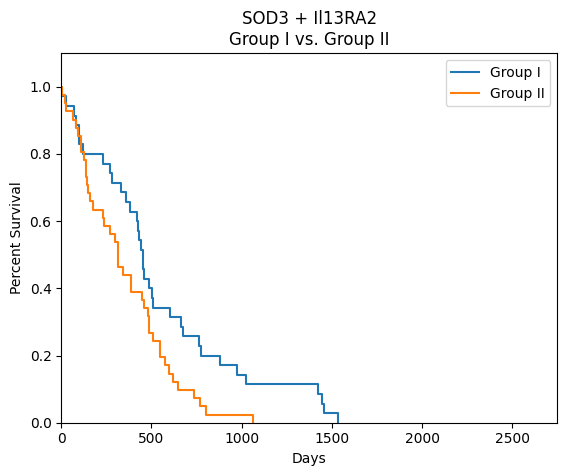

In [99]:
ra2_g1.plot(label = 'Group I', ci_show = False)
ra2_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("SOD3 + Il13RA2\nGroup I vs. Group II")
plt.ylim(0,1.1)
plt.xlim(0, 2750)
print('p_val: ' + str(round(ra2_pval, 6)))

p_val: 0.009471


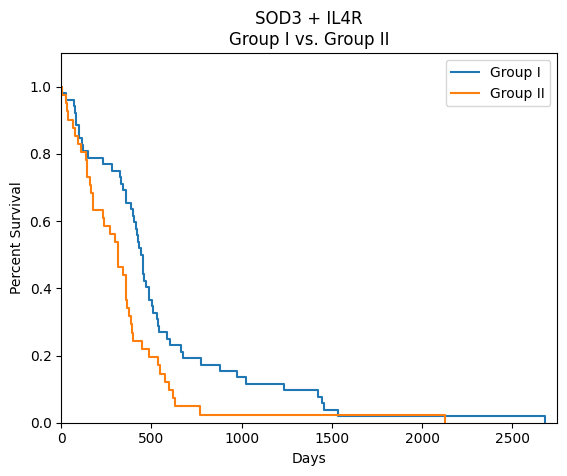

In [100]:
il4r_g1.plot(label = 'Group I', ci_show = False)
il4r_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("SOD3 + IL4R\nGroup I vs. Group II")
plt.ylim(0,1.1)
plt.xlim(0, 2750)
print('p_val: ' + str(round(il4r_pval, 6)))

In [103]:
tcf3 = {g:[] for g in col_name[1:]}

In [104]:
# perforem multigenic two group KM on all genes with TCF3
for g in col_name[1:]:
  if g != "log2_TCF3":
    print("TCF3 + " + g)
    tcf3[g] += twogroup_two_gene_km(gbm, "log2_TCF3", g)

TCF3 + log2_IL13RA1
(27, 218)
(20, 218)
380.0
329.0
0.4194160472453168
TCF3 + log2_IL13RA2
(23, 218)
(30, 218)
382.0
342.0
0.8996081857157525
TCF3 + log2_IL4
(30, 218)
(45, 218)
254.0
360.0
0.6413818084271077
TCF3 + log2_IL4R
(31, 218)
(21, 218)
405.0
329.0
0.24816578017074473
TCF3 + log2_NOTCH1
(64, 218)
(20, 218)
382.0
455.0
0.7113899877755463
TCF3 + log2_TOP2A
(30, 218)
(52, 218)
225.0
419.0
0.4182824183128202
TCF3 + log2_CD44
(18, 218)
(36, 218)
388.0
342.0
0.6121577270848741
TCF3 + log2_PTPRC
(30, 218)
(17, 218)
343.0
342.0
0.9302696954564043
TCF3 + log2_CDK4
(32, 218)
(40, 218)
225.0
360.0
0.5810089262767042
TCF3 + log2_HNRNPU
(59, 218)
(28, 218)
343.0
455.0
0.2825067983406692
TCF3 + log2_PDGFRA
(61, 218)
(13, 218)
382.0
357.0
0.7118168944872947
TCF3 + log2_CLCF1
(19, 218)
(43, 218)
448.0
360.0
0.302203430311363
TCF3 + log2_CCR1
(11, 218)
(38, 218)
395.0
357.0
0.6190162688826116
TCF3 + log2_TGFBR2
(40, 218)
(17, 218)
385.0
360.0
0.5647002340448704
TCF3 + log2_MYC
(32, 218)
(50, 2

In [106]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    if len(tcf3[g]) > 0:
      if tcf3[g][2] < 0.05:
        print(g)
        print(tcf3[g][2])

log2_RBBP4
0.016038175071269454


In [107]:
cdc6 = {g:[] for g in col_name[1:]}

# perforem multigenic two group KM on all genes with CDC6
for g in col_name[1:]:
  if g != "log2_CDC6":
    print("CDC6 + " + g)
    cdc6[g] += twogroup_two_gene_km(gbm, "log2_CDC6", g)

CDC6 + log2_IL13RA1
(3, 218)
(45, 218)
82.0
317.0
0.009478014878358676
CDC6 + log2_IL13RA2
(8, 218)
(64, 218)
399.0
357.0
0.30081311653032616
CDC6 + log2_IL4
(10, 218)
(74, 218)
342.0
384.0
0.30550936097979986
CDC6 + log2_IL4R
(5, 218)
(44, 218)
460.0
317.0
0.050518049017039914
CDC6 + log2_NOTCH1
(21, 218)
(26, 218)
362.0
395.0
0.3922151993221603
CDC6 + log2_TOP2A
(21, 218)
(92, 218)
362.0
388.0
0.6026712531420121
CDC6 + log2_CD44
(2, 218)
(69, 218)
36.0
335.0
0.299064629866597
CDC6 + log2_PTPRC
(4, 218)
(40, 218)
82.0
329.0
0.897942026782357
CDC6 + log2_CDK4
(15, 218)
(72, 218)
342.0
384.0
0.4124705989011014
CDC6 + log2_HNRNPU
(21, 218)
(39, 218)
362.0
455.0
0.8196091801995422
CDC6 + log2_PDGFRA
(20, 218)
(21, 218)
362.0
270.0
0.35649495410702636
CDC6 + log2_CLCF1
(3, 218)
(76, 218)
460.0
317.0
0.7354103413685655
CDC6 + log2_CCR1
(1, 218)
(77, 218)
148.0
357.0
0.18967601907647877
CDC6 + log2_TGFBR2
(4, 218)
(30, 218)
148.0
329.0
0.7207074113658245
CDC6 + log2_MYC
(10, 218)
(77, 218)
3

In [115]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    if len(cdc6[g]) > 0:
      if cdc6[g][2] < 0.05:
        print(g)
        print(cdc6[g][2])

log2_IL13RA1
0.009478014878358676
log2_SPHK1
0.04699392657598854
log2_PMAIP1
0.01198226283794171
log2_RBBP4
0.02009605667850249
log2_YBX1
1.6496002794119558e-11
log2_SOD3
0.026160497653190867
log2_IDH1
0.0026042540908484367
log2_SEC24D
0.002613619979095196


In [116]:
chd1 = {g:[] for g in col_name[1:]}

In [117]:
# perforem multigenic two group KM on all genes with CHD1
for g in col_name[1:]:
  if g != "log2_CHD1":
    print("CHD1 + " + g)
    chd1[g] += twogroup_two_gene_km(gbm, "log2_CHD1", g)

CHD1 + log2_IL13RA1
(37, 218)
(23, 218)
380.0
329.0
0.269852240250505
CHD1 + log2_IL13RA2
(32, 218)
(32, 218)
270.0
323.0
0.6114595256935711
CHD1 + log2_IL4
(34, 218)
(42, 218)
343.0
406.0
0.9518317729503764
CHD1 + log2_IL4R
(41, 218)
(24, 218)
427.0
329.0
0.15684664549385066
CHD1 + log2_NOTCH1
(65, 218)
(14, 218)
360.0
419.0
0.7301877808730501
CHD1 + log2_TOP2A
(27, 218)
(42, 218)
148.0
419.0
0.7302813819633156
CHD1 + log2_CD44
(24, 218)
(35, 218)
388.0
360.0
0.4609296292054249
CHD1 + log2_PTPRC
(45, 218)
(25, 218)
343.0
342.0
0.7302726577492181
CHD1 + log2_CDK4
(27, 218)
(28, 218)
335.0
406.0
0.9772084914926396
CHD1 + log2_HNRNPU
(68, 218)
(30, 218)
270.0
419.0
0.46682507176645216
CHD1 + log2_PDGFRA
(66, 218)
(11, 218)
380.0
357.0
0.4369286610908363
CHD1 + log2_CLCF1
(26, 218)
(43, 218)
427.0
360.0
0.2418903869822236
CHD1 + log2_CCR1
(18, 218)
(38, 218)
432.0
360.0
0.6204585334556478
CHD1 + log2_TGFBR2
(51, 218)
(21, 218)
335.0
329.0
0.7665880350621824
CHD1 + log2_MYC
(30, 218)
(41, 

In [118]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    if len(chd1[g]) > 0:
      if chd1[g][2] < 0.05:
        print(g)
        print(chd1[g][2])

log2_SPHK1
0.03621018204052327
log2_RBBP4
0.0119216552215768
log2_YBX1
1.0344331051092562e-07
log2_SNRNP40
1.0908515753019594e-11


In [119]:
ttc25 = {g:[] for g in col_name[1:]}

In [121]:
# perforem multigenic two group KM on all genes with TTC25
for g in col_name[1:]:
  if g != "log2_TTC25":
    print("ttc25 + " + g)
    ttc25[g] += twogroup_two_gene_km(gbm, "log2_TTC25", g)

ttc25 + log2_IL13RA1
(52, 218)
(22, 218)
432.0
269.0
0.060228184193542235
ttc25 + log2_IL13RA2
(50, 218)
(34, 218)
406.0
343.0
0.08901406639662687
ttc25 + log2_IL4
(35, 218)
(27, 218)
399.0
388.0
0.2641007351246506
ttc25 + log2_IL4R
(51, 218)
(18, 218)
454.0
335.0
0.047500785782683505
ttc25 + log2_NOTCH1
(78, 218)
(11, 218)
382.0
357.0
0.3384502613409594
ttc25 + log2_TOP2A
(28, 218)
(27, 218)
329.0
343.0
0.4245399397074896
ttc25 + log2_CD44
(38, 218)
(33, 218)
406.0
269.0
0.08012812919776034
ttc25 + log2_PTPRC
(54, 218)
(18, 218)
427.0
360.0
0.20010349664645766
ttc25 + log2_CDK4
(37, 218)
(22, 218)
375.0
343.0
0.1008031001326661
ttc25 + log2_HNRNPU
(69, 218)
(15, 218)
380.0
419.0
0.9117672147132084
ttc25 + log2_PDGFRA
(78, 218)
(7, 218)
405.0
357.0
0.9420675244207779
ttc25 + log2_CLCF1
(32, 218)
(33, 218)
448.0
300.0
0.032188454934424654
ttc25 + log2_CCR1
(26, 218)
(30, 218)
448.0
269.0
0.033580816312828006
ttc25 + log2_TGFBR2
(56, 218)
(10, 218)
427.0
300.0
0.49143681705538833
ttc25 +

In [122]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    if len(ttc25[g]) > 0:
      if ttc25[g][2] < 0.05:
        print(g)
        print(ttc25[g][2])

log2_IL4R
0.047500785782683505
log2_CLCF1
0.032188454934424654
log2_CCR1
0.033580816312828006
log2_SPHK1
0.0022882097491134404
log2_PTBP1
0.047346142234071235
log2_PMAIP1
0.02243422247616854
log2_RBBP4
0.0030475003242158866
log2_YBX1
0.03754092089635722
log2_UBE2I
0.023770075259552593
log2_FAS
0.023411049474713893
log2_SOD3
0.024692568020870546
log2_MCAM
0.005244477404282803
log2_IDH1
0.04625025415219517
log2_LMNA
0.04265032620980488
log2_CALM3
0.01624503383463262
log2_HAVCR2
0.02682349182659652
log2_MYOF
0.037552129810920445
log2_SSBP1
0.017917210850023686
log2_PDPN
0.019848305898569323


In [123]:
rbbp4 = {g:[] for g in col_name[1:]}

In [124]:
# perforem multigenic two group KM on all genes with RBBP4
for g in col_name[1:]:
  if g != "log2_RBBP4":
    print("rbbp4 + " + g)
    rbbp4[g] += twogroup_two_gene_km(gbm, "log2_RBBP4", g)

rbbp4 + log2_IL13RA1
(4, 218)
(53, 218)
82.0
342.0
0.5366600963633523
rbbp4 + log2_IL13RA2
(8, 218)
(71, 218)
270.0
357.0
0.14181965201267313
rbbp4 + log2_IL4
(6, 218)
(77, 218)
108.0
388.0
0.0018643317484614093
rbbp4 + log2_IL4R
(4, 218)
(50, 218)
83.0
317.0
0.44904179028029645
rbbp4 + log2_NOTCH1
(12, 218)
(24, 218)
83.0
395.0
0.10475225070729352
rbbp4 + log2_TOP2A
(11, 218)
(89, 218)
83.0
388.0
0.0006700518320581454
rbbp4 + log2_CD44
(2, 218)
(76, 218)
36.0
360.0
0.9380864880238512
rbbp4 + log2_PTPRC
(8, 218)
(51, 218)
270.0
360.0
0.30136502363464585
rbbp4 + log2_CDK4
(9, 218)
(73, 218)
83.0
385.0
0.02655231546051178
rbbp4 + log2_HNRNPU
(13, 218)
(38, 218)
108.0
419.0
0.004225339974121625
rbbp4 + log2_PDGFRA
(11, 218)
(19, 218)
83.0
335.0
0.07558343005620623
rbbp4 + log2_CLCF1
(2, 218)
(82, 218)
82.0
342.0
0.9539716831814622
rbbp4 + log2_CCR1
(1, 218)
(84, 218)
772.0
362.0
0.44039352232025963
rbbp4 + log2_TGFBR2
(6, 218)
(39, 218)
119.0
343.0
0.039963730247242174
rbbp4 + log2_MYC
(3

In [125]:
# get the ones that are significant ( pval < 0.05)
for g in col_name[1:]:
    if len(rbbp4[g]) > 0:
      if rbbp4[g][2] < 0.05:
        print(g)
        print(rbbp4[g][2])

log2_IL4
0.0018643317484614093
log2_TOP2A
0.0006700518320581454
log2_CDK4
0.02655231546051178
log2_HNRNPU
0.004225339974121625
log2_TGFBR2
0.039963730247242174
log2_MYC
2.151978390426975e-11
log2_TCF3
0.016038175071269454
log2_CENPA
0.004684075336776689
log2_SMC4
0.0011637722913829453
log2_CDC20
0.002329006369828699
log2_CDC6
0.02009605667850249
log2_SSRP1
7.281940562374968e-07
log2_PTBP1
0.0003785289617142721
log2_SMC3
0.02914125067334826
log2_DKC1
0.0009565020744945111
log2_POLR2D
0.010352150425572316
log2_MECOM
5.901415450243516e-05
log2_SYNCRIP
1.7306906176615473e-15
log2_YBX1
0.008435744403955161
log2_WRAP53
0.004066792111415715
log2_ELAVL1
0.0012823883130476364
log2_RUNX1
0.00039697797550667486
log2_IDH1
0.00505096051182927
log2_FUS
0.021658949694423585
log2_CHD1
0.0119216552215768
log2_GART
7.420476765634721e-07
log2_ATP2B2
0.029702466417774173
log2_PPP3CA
0.03654223977900147
log2_VAMP2
0.010237253850186305
log2_EHD4
0.0041473867990347016
log2_AIMP1
0.004453889113902045
log2_MCP

In [126]:
# function to perform multigenic KM analysis of data (three genes)
# separate data into 2 groups
# input dataframe, gene 1 and gene 2
# output: survival curve of each group, median survival day of each group and p val for group I vs group II
def twogroup_three_gene_km(df, gene1, gene2, gene3):
  g1 = df.loc[(df[gene1] <= 0) & (df[gene2] <= 0) & (df[gene3] <= 0)]
  g2 = df.loc[(df[gene1] > 0) & (df[gene2] > 0) & (df[gene3] > 0)]

  print(g1.shape)
  print(g2.shape)

  if g1.shape[0] == 0 or g2.shape[0] == 0:
    return []

  s1 = KaplanMeierFitter()
  T = g1.days_to_death
  C = [True for i in range(len(g1.days_to_death))]
  s1.fit(T, C)
  g1_ms = s1.median_survival_time_

  s2 = KaplanMeierFitter()
  T = g2.days_to_death
  C = [True for i in range(len(g2.days_to_death))]
  s2.fit(T, C)
  g2_ms = s2.median_survival_time_

  print(g1_ms)
  print(g2_ms)

  r1 = logrank_test(g1.days_to_death, g2.days_to_death)

  print(r1.p_value)

  sc = [s1, s2]
  ms = [g1_ms, g2_ms]
  pval = r1.p_value

  return [sc, ms, pval]

In [129]:
# chd1, ybx1, snrnp40
threegene = twogroup_three_gene_km(gbm, "log2_CHD1", "log2_YBX1", "log2_SNRNP40")

(2, 218)
(51, 218)
6.0
385.0
1.832025975474522e-08


In [132]:
three_g1 = threegene[0][0]
three_g2 = threegene[0][1]
three_pval = threegene[2]

p_val: 1.905307014493503e-06


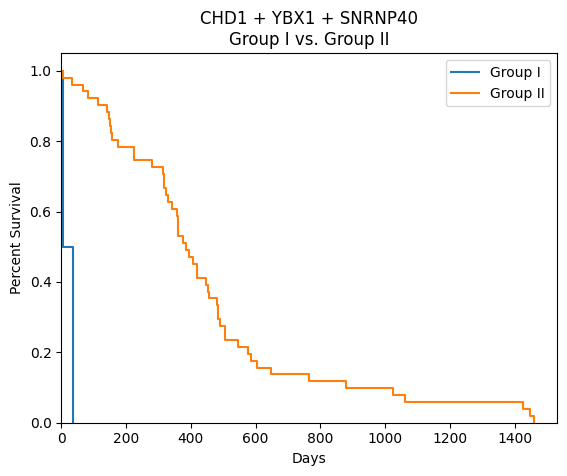

In [140]:
three_g1.plot(label = 'Group I', ci_show = False)
three_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("CHD1 + YBX1 + SNRNP40\nGroup I vs. Group II")
plt.ylim(0,None)
plt.xlim(0, None)
print('p_val: ' + str(three_pval*104)) # correction with 104 genes

In [136]:
# RBBP4, GART, SYNCRIP
threegene_2 = twogroup_three_gene_km(gbm, "log2_RBBP4", "log2_GART", "log2_SYNCRIP")

(4, 218)
(78, 218)
28.0
395.0
1.784118866680497e-20


In [137]:
t2_g1 = threegene_2[0][0]
t2_g2 = threegene_2[0][1]
t2_pval = threegene_2[2]

p_val: 1.855483621347717e-18


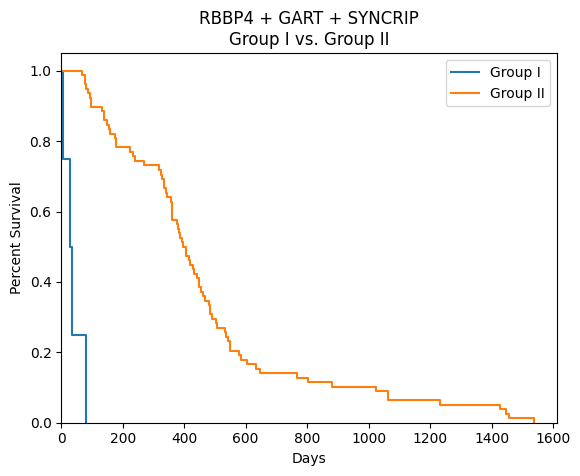

In [141]:
t2_g1.plot(label = 'Group I', ci_show = False)
t2_g2.plot(label = "Group II", ci_show = False)
plt.xlabel("Days")
plt.ylabel("Percent Survival")
plt.title("RBBP4 + GART + SYNCRIP\nGroup I vs. Group II")
plt.ylim(0,None)
plt.xlim(0, None)
print('p_val: ' + str(t2_pval*104)) # correction with 104 genes